In [144]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib as mpl
import matplotlib.font_manager as font_manager
import plotly.graph_objects as go
import plotly.offline as pyo
from pathlib import Path

#Request for the json file of the defenders' data -> obtained on postman and adapting the url to increase the limit and get all players data
#Also we filtered only the midfields with over 20 matches and normalized the stats by 90 minutes played to each player in order to compare properly
#We had to split the requests in 2 parts because the limit of the API is 100 per request

url = "https://api.sofascore.com/api/v1/unique-tournament/325/season/27591/statistics?limit=100&order=-rating&accumulation=per90&fields=assists%2CaccurateFinalThirdPasses%2CbigChancesCreated%2CaccuratePassesPercentage%2CsuccessfulDribblesPercentage%2Cgoals&filters=appearances.GT.20%2Cposition.in.M"

payload={}
headers = {
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:83.0) Gecko/20100101 Firefox/83.0',
  'Accept': '*/*',
  'Accept-Language': 'pt-BR,pt;q=0.8,en-US;q=0.5,en;q=0.3',
  'Referer': 'https://www.sofascore.com/tournament/football/brazil/brasileiro-serie-a/325',
  'Origin': 'https://www.sofascore.com',
  'Connection': 'keep-alive',
  'TE': 'Trailers',
  'Cookie': '__cfduid=d9abe87eb214a7e6080a15fbdbd7055c01619186545'
}

r1 = requests.get(url, headers = headers)
mf_data = r1.json()
df_mf1 = pd.json_normalize(mf_data['results'])
df_mf1.head(100)

url2 = "https://api.sofascore.com/api/v1/unique-tournament/325/season/27591/statistics?limit=100&order=-rating&offset=100&accumulation=per90&fields=assists%2CaccurateFinalThirdPasses%2CbigChancesCreated%2CaccuratePassesPercentage%2CsuccessfulDribblesPercentage%2Cgoals&filters=appearances.GT.20%2Cposition.in.M"
payload={}
headers = {
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:83.0) Gecko/20100101 Firefox/83.0',
  'Accept': '*/*',
  'Accept-Language': 'pt-BR,pt;q=0.8,en-US;q=0.5,en;q=0.3',
  'Referer': 'https://www.sofascore.com/tournament/football/brazil/brasileiro-serie-a/325',
  'Origin': 'https://www.sofascore.com',
  'Connection': 'keep-alive',
  'TE': 'Trailers',
  'Cookie': '__cfduid=d9abe87eb214a7e6080a15fbdbd7055c01619186545'
}

r2 = requests.get(url2, headers = headers)
mf_data = r2.json()
df_mf2 = pd.json_normalize(mf_data['results'])

df_mf = df_mf1.append(df_mf2)
df_mf

,assists,accurateFinalThirdPasses,bigChancesCreated,accuratePassesPercentage,successfulDribblesPercentage,goals,player.name,player.slug,player.userCount,player.id,team.name,team.slug,team.shortName,team.userCount,team.type,team.id,team.teamColors.primary,team.teamColors.secondary,team.teamColors.text
0,0.37,16.76,0.65,79.02,72.06,0.32,Giorgian De Arrascaeta,giorgian-de-arrascaeta,8805,333587,Flamengo,flamengo,Flamengo,0,0,5981,#52b030,#52b030,#ffffff
1,0.19,17.30,0.32,82.25,54.81,0.57,Claudinho,claudinho,2498,817578,Red Bull Bragantino,red-bull-bragantino,Red Bull Bragantino,0,0,1999,#52b030,#52b030,#ffffff
2,0.31,13.00,0.31,82.36,63.16,0.45,Vina,vina,1371,1101714,Ceará SC,ceara-sc,Ceará SC,0,0,2001,#52b030,#52b030,#ffffff
3,0.10,17.57,0.20,88.28,66.67,0.03,Dani Alves,dani-alves,8663,4419,São Paulo,sao-paulo,São Paulo,0,0,1981,#52b030,#52b030,#ffffff
4,0.32,12.57,0.39,73.40,55.74,0.35,Keno,keno,1228,787607,Atlético Mineiro,atletico-mineiro,Atlético Mineiro,0,0,1977,#52b030,#52b030,#ffffff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,0.09,6.69,0.09,75.25,44.12,0.00,Douglas Baggio,douglas-baggio,63,795035,Goiás,goias,Goiás,0,0,1960,#52b030,#52b030,#ffffff
18,0.00,7.66,0.00,77.18,54.90,0.15,Arthur Gomes,arthur-gomes,206,822524,Santos,santos,Santos,0,0,1968,#52b030,#52b030,#ffffff
19,0.00,5.39,0.00,81.77,83.33,0.00,Willian Maranhão,willian-maranhao,60,868120,Atlético Goianiense,atletico-goianiense,Atlético Goianiense,0,0,7314,#52b030,#52b030,#ffffff
20,0.00,9.30,0.16,78.06,42.86,0.08,Salomon Kalou,salomon-kalou,1562,10086,Botafogo,botafogo,Botafogo,0,0,1958,#52b030,#52b030,#ffffff


In [145]:
#Here we are getting more stats columns as the API limits us to 6 fields per request

url = "https://api.sofascore.com/api/v1/unique-tournament/325/season/27591/statistics?limit=100&order=-rating&accumulation=per90&fields=groundDuelsWonPercentage%2CaerialDuelsWonPercentage%2Cfouls%2CpossessionLost%2Ctackles%2Cinterceptions&filters=appearances.GT.20%2Cposition.in.M"

payload={}
headers = {
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:83.0) Gecko/20100101 Firefox/83.0',
  'Accept': '*/*',
  'Accept-Language': 'pt-BR,pt;q=0.8,en-US;q=0.5,en;q=0.3',
  'Referer': 'https://www.sofascore.com/tournament/football/brazil/brasileiro-serie-a/325',
  'Origin': 'https://www.sofascore.com',
  'Connection': 'keep-alive',
  'TE': 'Trailers',
  'Cookie': '__cfduid=d9abe87eb214a7e6080a15fbdbd7055c01619186545'
}

r3 = requests.get(url, headers = headers)
mf_data_comp = r3.json()
mf_comp1 = pd.json_normalize(mf_data_comp['results'])

url = "https://api.sofascore.com/api/v1/unique-tournament/325/season/27591/statistics?limit=100&offset=100order=-rating&accumulation=per90&fields=groundDuelsWonPercentage%2CaerialDuelsWonPercentage%2Cfouls%2CpossessionLost%2Ctackles%2Cinterceptions&filters=appearances.GT.20%2Cposition.in.M"

payload={}
headers = {
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:83.0) Gecko/20100101 Firefox/83.0',
  'Accept': '*/*',
  'Accept-Language': 'pt-BR,pt;q=0.8,en-US;q=0.5,en;q=0.3',
  'Referer': 'https://www.sofascore.com/tournament/football/brazil/brasileiro-serie-a/325',
  'Origin': 'https://www.sofascore.com',
  'Connection': 'keep-alive',
  'TE': 'Trailers',
  'Cookie': '__cfduid=d9abe87eb214a7e6080a15fbdbd7055c01619186545'
}

r4 = requests.get(url, headers = headers)
mf_data_comp = r4.json()
mf_comp2 = pd.json_normalize(mf_data_comp['results'])

df_mf_comp = mf_comp1.append(mf_comp2)
df_mf_comp

,groundDuelsWonPercentage,aerialDuelsWonPercentage,fouls,possessionLost,tackles,interceptions,player.name,player.slug,player.userCount,player.id,team.name,team.slug,team.shortName,team.userCount,team.type,team.id,team.teamColors.primary,team.teamColors.secondary,team.teamColors.text
0,57.45,46.15,0.73,18.67,1.70,0.24,Giorgian De Arrascaeta,giorgian-de-arrascaeta,8805,333587,Flamengo,flamengo,Flamengo,0,0,5981,#52b030,#52b030,#ffffff
1,45.45,31.82,1.04,18.06,1.10,1.20,Claudinho,claudinho,2498,817578,Red Bull Bragantino,red-bull-bragantino,Red Bull Bragantino,0,0,1999,#52b030,#52b030,#ffffff
2,46.97,52.00,0.55,13.86,0.38,0.38,Vina,vina,1371,1101714,Ceará SC,ceara-sc,Ceará SC,0,0,2001,#52b030,#52b030,#ffffff
3,52.17,42.50,2.14,16.57,1.77,0.64,Dani Alves,dani-alves,8663,4419,São Paulo,sao-paulo,São Paulo,0,0,1981,#52b030,#52b030,#ffffff
4,54.97,42.86,1.26,19.77,1.44,0.63,Keno,keno,1228,787607,Atlético Mineiro,atletico-mineiro,Atlético Mineiro,0,0,1977,#52b030,#52b030,#ffffff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,53.19,26.67,2.06,13.80,2.40,0.77,Douglas Baggio,douglas-baggio,63,795035,Goiás,goias,Goiás,0,0,1960,#52b030,#52b030,#ffffff
18,39.39,36.36,1.68,14.45,0.73,1.17,Arthur Gomes,arthur-gomes,206,822524,Santos,santos,Santos,0,0,1968,#52b030,#52b030,#ffffff
19,43.75,43.75,2.05,8.12,1.49,1.86,Willian Maranhão,willian-maranhao,60,868120,Atlético Goianiense,atletico-goianiense,Atlético Goianiense,0,0,7314,#52b030,#52b030,#ffffff
20,38.39,32.50,1.55,13.06,0.73,0.49,Salomon Kalou,salomon-kalou,1562,10086,Botafogo,botafogo,Botafogo,0,0,1958,#52b030,#52b030,#ffffff


In [146]:
df_mf = df_mf.merge(df_mf_comp, left_on='player.id', right_on='player.id', how = 'inner')
print(df_mf.columns)

Index(['assists', 'accurateFinalThirdPasses', 'bigChancesCreated',
       'accuratePassesPercentage', 'successfulDribblesPercentage', 'goals',
       'player.name_x', 'player.slug_x', 'player.userCount_x', 'player.id',
       'team.name_x', 'team.slug_x', 'team.shortName_x', 'team.userCount_x',
       'team.type_x', 'team.id_x', 'team.teamColors.primary_x',
       'team.teamColors.secondary_x', 'team.teamColors.text_x',
       'groundDuelsWonPercentage', 'aerialDuelsWonPercentage', 'fouls',
       'possessionLost', 'tackles', 'interceptions', 'player.name_y',
       'player.slug_y', 'player.userCount_y', 'team.name_y', 'team.slug_y',
       'team.shortName_y', 'team.userCount_y', 'team.type_y', 'team.id_y',
       'team.teamColors.primary_y', 'team.teamColors.secondary_y',
       'team.teamColors.text_y'],
      dtype='object')


In [147]:
cols = ['player.userCount_x', 'player.slug_x','team.userCount_x','team.type_x','team.userCount_y','team.type_y','player.id', 'team.slug_x', 'team.shortName_x',
       'team.type_x', 'team.id_x', 'team.teamColors.primary_x', 'team.teamColors.secondary_x',
       'team.teamColors.text_x', 'player.name_y', 'player.slug_y', 'player.userCount_y', 'team.name_y',
       'team.slug_y', 'team.shortName_y', 'team.userCount_y', 'team.type_y',
       'team.id_y', 'team.teamColors.primary_y', 'team.teamColors.secondary_y',
       'team.teamColors.text_y','team.userCount_x']

df_mf.drop(columns=cols,inplace=True)
df_mf.reset_index(drop=True)

df_mf.head(20)

,assists,accurateFinalThirdPasses,bigChancesCreated,accuratePassesPercentage,successfulDribblesPercentage,goals,player.name_x,team.name_x,groundDuelsWonPercentage,aerialDuelsWonPercentage,fouls,possessionLost,tackles,interceptions
0,0.37,16.76,0.65,79.02,72.06,0.32,Giorgian De Arrascaeta,Flamengo,57.45,46.15,0.73,18.67,1.70,0.24
1,0.19,17.30,0.32,82.25,54.81,0.57,Claudinho,Red Bull Bragantino,45.45,31.82,1.04,18.06,1.10,1.20
2,0.31,13.00,0.31,82.36,63.16,0.45,Vina,Ceará SC,46.97,52.00,0.55,13.86,0.38,0.38
3,0.10,17.57,0.20,88.28,66.67,0.03,Dani Alves,São Paulo,52.17,42.50,2.14,16.57,1.77,0.64
4,0.32,12.57,0.39,73.40,55.74,0.35,Keno,Atlético Mineiro,54.97,42.86,1.26,19.77,1.44,0.63
5,0.10,9.78,0.16,86.89,85.37,0.10,Juninho Valoura,Fortaleza,56.35,49.02,1.73,12.95,1.99,1.34
6,0.16,11.23,0.16,80.87,59.63,0.03,Artur,Red Bull Bragantino,55.90,32.00,0.80,15.37,1.03,0.58
7,0.20,18.99,0.41,83.75,69.47,0.24,Everton Ribeiro,Flamengo,51.56,30.77,1.33,15.87,1.70,1.29
8,0.10,17.95,0.16,90.47,80.33,0.03,Gerson,Flamengo,60.30,50.00,2.41,10.58,1.80,0.71
9,0.20,10.87,0.32,80.24,56.52,0.32,Nenê,Fluminense,50.85,39.58,0.64,16.73,0.76,0.16


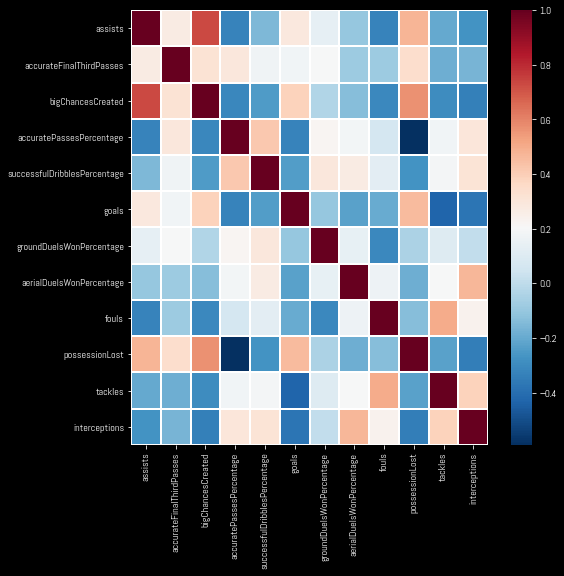

In [148]:
corr_matrix = df_mf.corr()
fig,ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr_matrix, linewidths=.3, cmap = 'RdBu_r')
fig.savefig('corrmatrixmf.png')

In [149]:
df_mf = df_mf.rename(columns = {'player.name_x':'player', 'team.name_x':'team' })
df_mf

,assists,accurateFinalThirdPasses,bigChancesCreated,accuratePassesPercentage,successfulDribblesPercentage,goals,player,team,groundDuelsWonPercentage,aerialDuelsWonPercentage,fouls,possessionLost,tackles,interceptions
0,0.37,16.76,0.65,79.02,72.06,0.32,Giorgian De Arrascaeta,Flamengo,57.45,46.15,0.73,18.67,1.70,0.24
1,0.19,17.30,0.32,82.25,54.81,0.57,Claudinho,Red Bull Bragantino,45.45,31.82,1.04,18.06,1.10,1.20
2,0.31,13.00,0.31,82.36,63.16,0.45,Vina,Ceará SC,46.97,52.00,0.55,13.86,0.38,0.38
3,0.10,17.57,0.20,88.28,66.67,0.03,Dani Alves,São Paulo,52.17,42.50,2.14,16.57,1.77,0.64
4,0.32,12.57,0.39,73.40,55.74,0.35,Keno,Atlético Mineiro,54.97,42.86,1.26,19.77,1.44,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0.09,6.69,0.09,75.25,44.12,0.00,Douglas Baggio,Goiás,53.19,26.67,2.06,13.80,2.40,0.77
118,0.00,7.66,0.00,77.18,54.90,0.15,Arthur Gomes,Santos,39.39,36.36,1.68,14.45,0.73,1.17
119,0.00,5.39,0.00,81.77,83.33,0.00,Willian Maranhão,Atlético Goianiense,43.75,43.75,2.05,8.12,1.49,1.86
120,0.00,9.30,0.16,78.06,42.86,0.08,Salomon Kalou,Botafogo,38.39,32.50,1.55,13.06,0.73,0.49


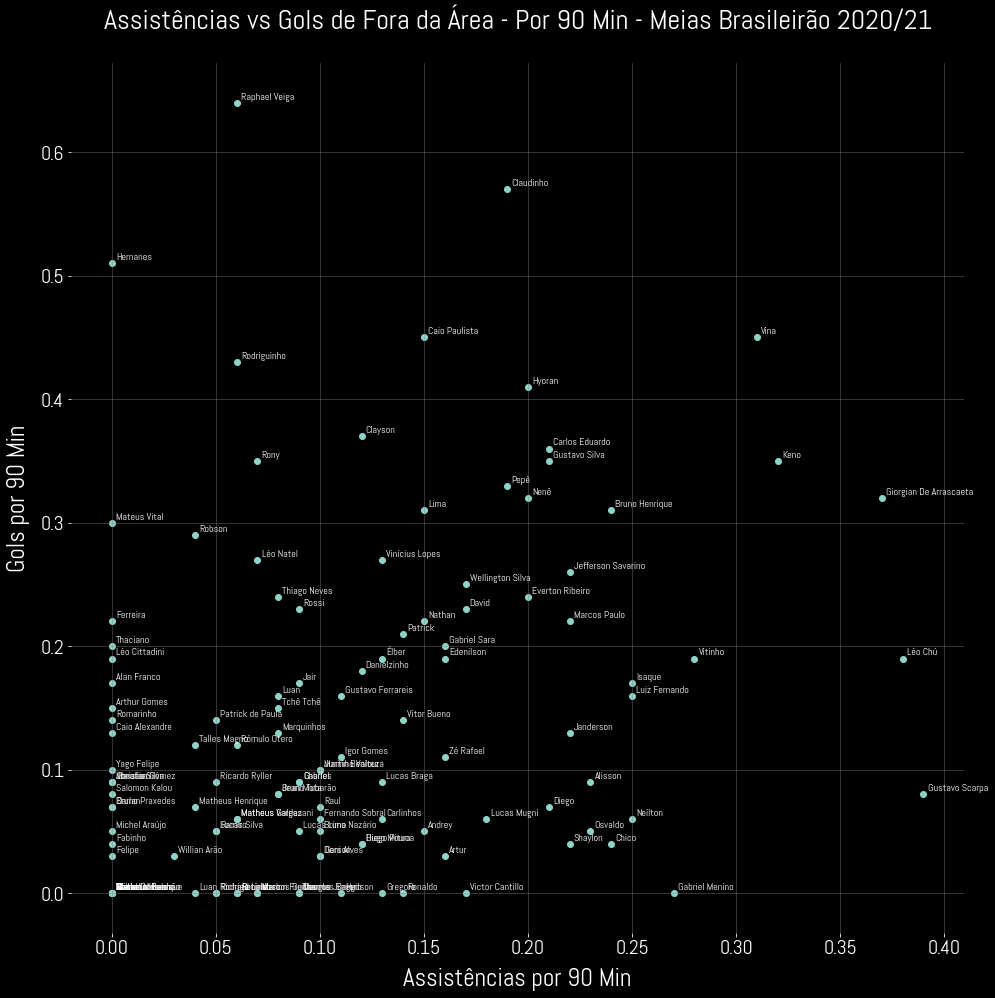

In [150]:
#Defining style and properties
plt.style.use('dark_background')
plt.rc('font', family='Abel')
fig,ax = plt.subplots(figsize=(16,16))
fpath = Path(mpl.get_data_path(), "fonts/ttf/Merriweather-Regular.ttf")

#Defining the scatter
plt.scatter(df_mf['assists'],df_mf['goals'])

#Annotation on the scatter points
for i in range (df_mf.shape[0]):
    plt.text(x=df_mf.assists[i] + 0.002,
             y=df_mf.goals[i] + 0.003,
             s = df_mf.player[i])
    
#Grid and axis properties
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))

#Texts
plt.title(f'Assistências vs Gols de Fora da Área - Por 90 Min - Meias Brasileirão 2020/21',
          fontsize = 28, pad = 35)
plt.xlabel(xlabel='Assistências por 90 Min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='Gols por 90 Min', fontsize = 25, labelpad = 10)

#Showing the plot
plt.show()

#Saving
fig.savefig('AssistsvsGols.png')

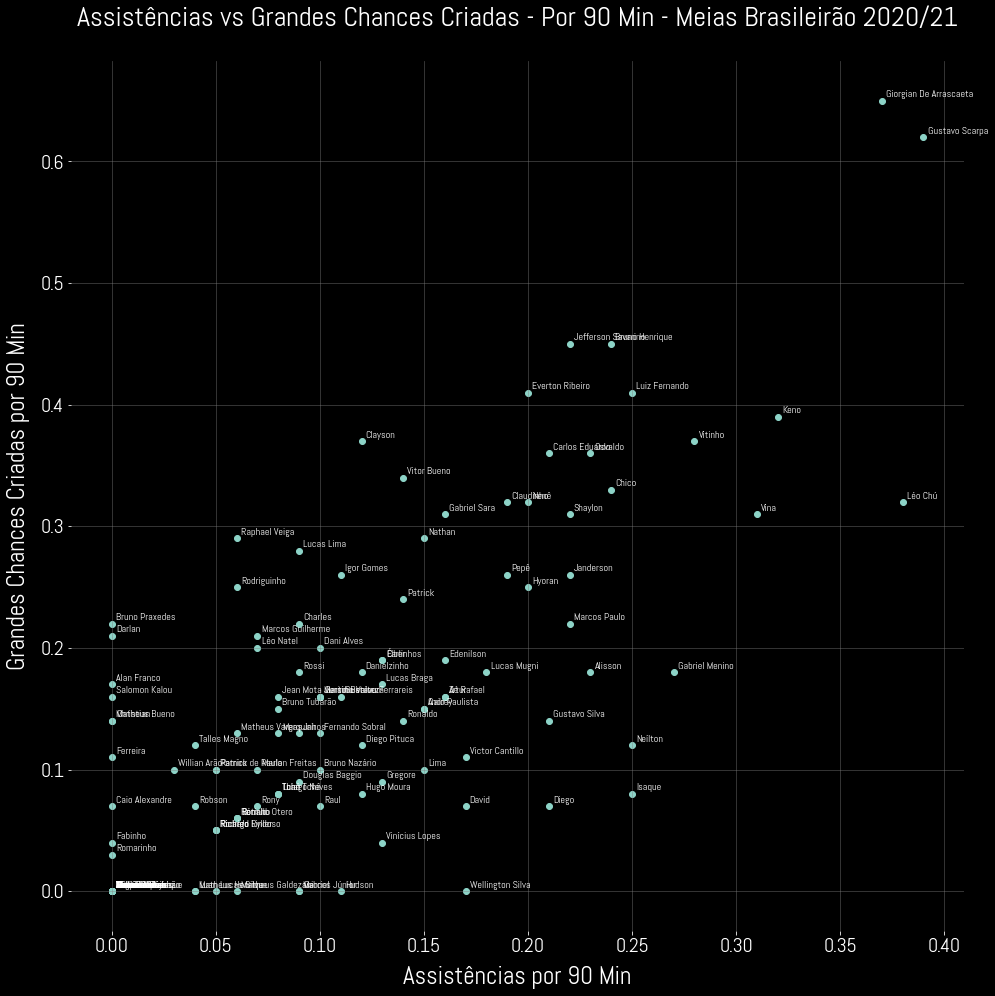

In [151]:
#Defining style and properties
plt.style.use('dark_background')
plt.rc('font', family='Abel')
fig,ax = plt.subplots(figsize=(16,16))
fpath = Path(mpl.get_data_path(), "fonts/ttf/Merriweather-Regular.ttf")

#Defining the scatter
plt.scatter(df_mf['assists'],df_mf['bigChancesCreated'])

#Annotation on the scatter points
for i in range (df_mf.shape[0]):
    plt.text(x=df_mf.assists[i] + 0.002,
             y=df_mf.bigChancesCreated[i] + 0.003,
             s = df_mf.player[i])
    
#Grid and axis properties
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))

#Texts
plt.title(f'Assistências vs Grandes Chances Criadas - Por 90 Min - Meias Brasileirão 2020/21',
          fontsize = 28, pad = 35)
plt.xlabel(xlabel='Assistências por 90 Min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='Grandes Chances Criadas por 90 Min', fontsize = 25, labelpad = 10)

#Showing the plot
plt.show()

#Saving
fig.savefig('AssistsvsGrandesChancesCriadas.png')

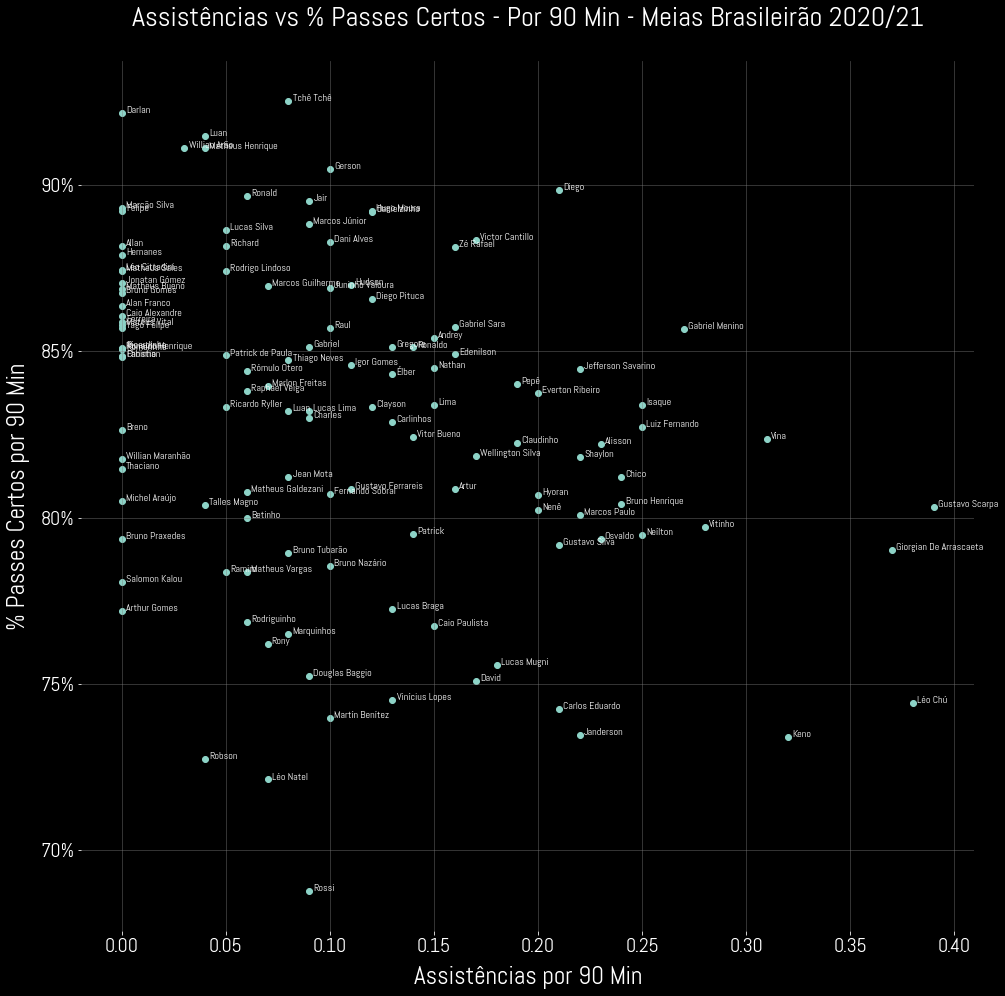

In [152]:
#Defining style and properties
plt.style.use('dark_background')
plt.rc('font', family='Abel')
fig,ax = plt.subplots(figsize=(16,16))
fpath = Path(mpl.get_data_path(), "fonts/ttf/Merriweather-Regular.ttf")

#Defining the scatter
plt.scatter(df_mf['assists'],df_mf['accuratePassesPercentage'])

#Annotation on the scatter points
for i in range (df_mf.shape[0]):
    plt.text(x=df_mf.assists[i] + 0.002,
             y=df_mf.accuratePassesPercentage[i] + 0.003,
             s = df_mf.player[i])
    
#Grid and axis properties
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))

#Texts
plt.title(f'Assistências vs % Passes Certos - Por 90 Min - Meias Brasileirão 2020/21',
          fontsize = 28, pad = 35)
plt.xlabel(xlabel='Assistências por 90 Min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='% Passes Certos por 90 Min', fontsize = 25, labelpad = 10)

#Showing the plot
plt.show()

#Saving
fig.savefig('AssistsvsPctgPassesCertos.png')

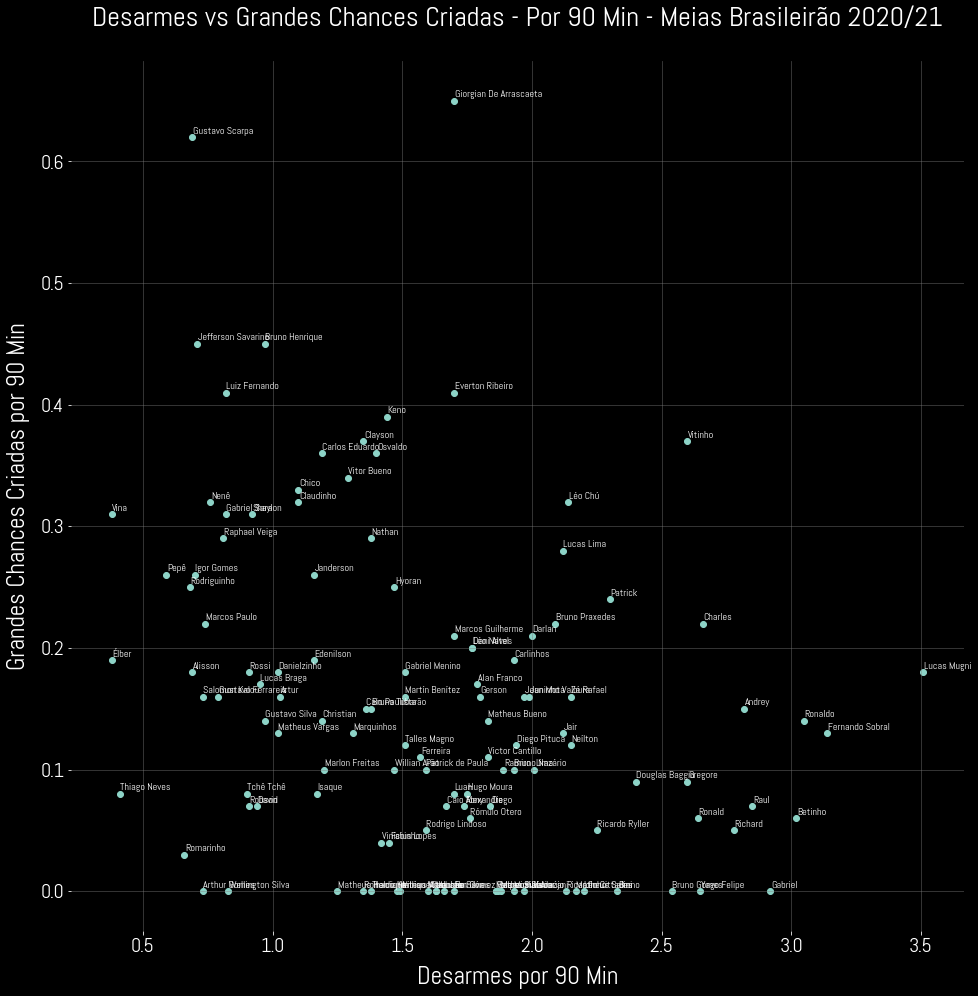

In [153]:
#Defining style and properties
plt.style.use('dark_background')
plt.rc('font', family='Abel')
fig,ax = plt.subplots(figsize=(16,16))
fpath = Path(mpl.get_data_path(), "fonts/ttf/Merriweather-Regular.ttf")

#Defining the scatter
plt.scatter(df_mf['tackles'],df_mf['bigChancesCreated'])

#Annotation on the scatter points
for i in range (df_mf.shape[0]):
    plt.text(x=df_mf.tackles[i] + 0.002,
             y=df_mf.bigChancesCreated[i] + 0.003,
             s = df_mf.player[i])
    
#Grid and axis properties
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))

#Texts
plt.title(f'Desarmes vs Grandes Chances Criadas - Por 90 Min - Meias Brasileirão 2020/21',
          fontsize = 28, pad = 35)
plt.xlabel(xlabel='Desarmes por 90 Min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='Grandes Chances Criadas por 90 Min', fontsize = 25, labelpad = 10)

#Showing the plot
plt.show()

#Saving
fig.savefig('DesarmesvsGrandesChancesCriadas.png')

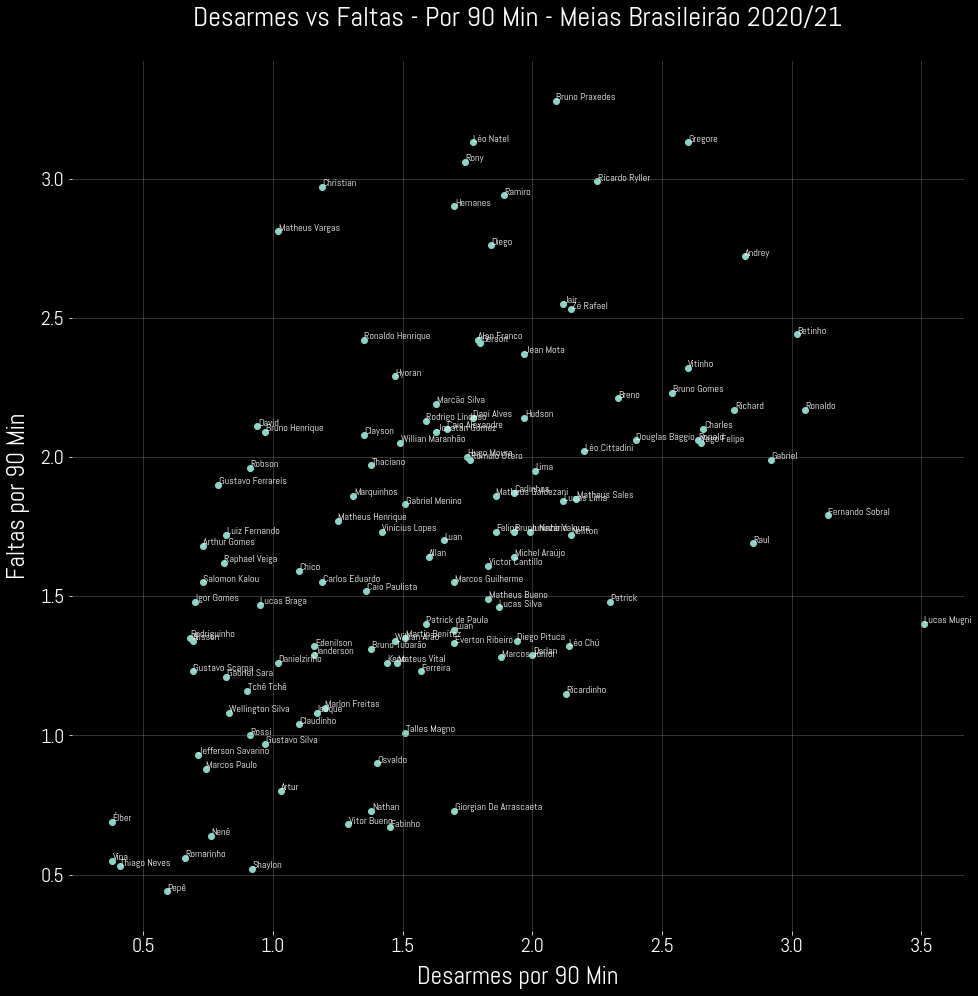

In [154]:
#Defining style and properties
plt.style.use('dark_background')
plt.rc('font', family='Abel')
fig,ax = plt.subplots(figsize=(16,16))
fpath = Path(mpl.get_data_path(), "fonts/ttf/Merriweather-Regular.ttf")

#Defining the scatter
plt.scatter(df_mf['tackles'],df_mf['fouls'])

#Annotation on the scatter points
for i in range (df_mf.shape[0]):
    plt.text(x=df_mf.tackles[i] + 0.002,
             y=df_mf.fouls[i] + 0.003,
             s = df_mf.player[i])
    
#Grid and axis properties
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))

#Texts
plt.title(f'Desarmes vs Faltas - Por 90 Min - Meias Brasileirão 2020/21',
          fontsize = 28, pad = 35)
plt.xlabel(xlabel='Desarmes por 90 Min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='Faltas por 90 Min', fontsize = 25, labelpad = 10)

#Showing the plot
plt.show()

#Saving
fig.savefig('DesarmesvsFaltas.png')

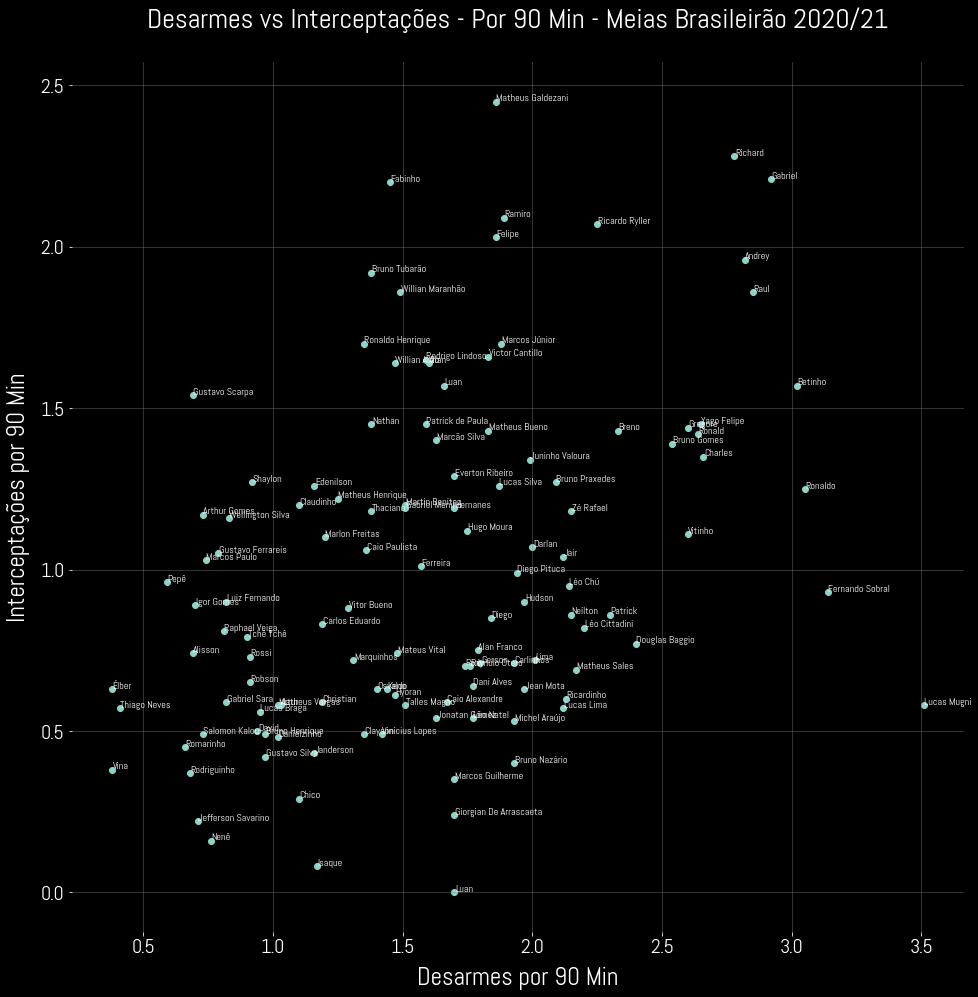

In [155]:
#Defining style and properties
plt.style.use('dark_background')
plt.rc('font', family='Abel')
fig,ax = plt.subplots(figsize=(16,16))
fpath = Path(mpl.get_data_path(), "fonts/ttf/Merriweather-Regular.ttf")

#Defining the scatter
plt.scatter(df_mf['tackles'],df_mf['interceptions'])

#Annotation on the scatter points
for i in range (df_mf.shape[0]):
    plt.text(x=df_mf.tackles[i] + 0.002,
             y=df_mf.interceptions[i] + 0.003,
             s = df_mf.player[i])
    
#Grid and axis properties
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))

#Texts
plt.title(f'Desarmes vs Interceptações - Por 90 Min - Meias Brasileirão 2020/21',
          fontsize = 28, pad = 35)
plt.xlabel(xlabel='Desarmes por 90 Min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='Interceptações por 90 Min', fontsize = 25, labelpad = 10)

#Showing the plot
plt.show()

#Saving
fig.savefig('DesarmesvsInterceptacoes.png')

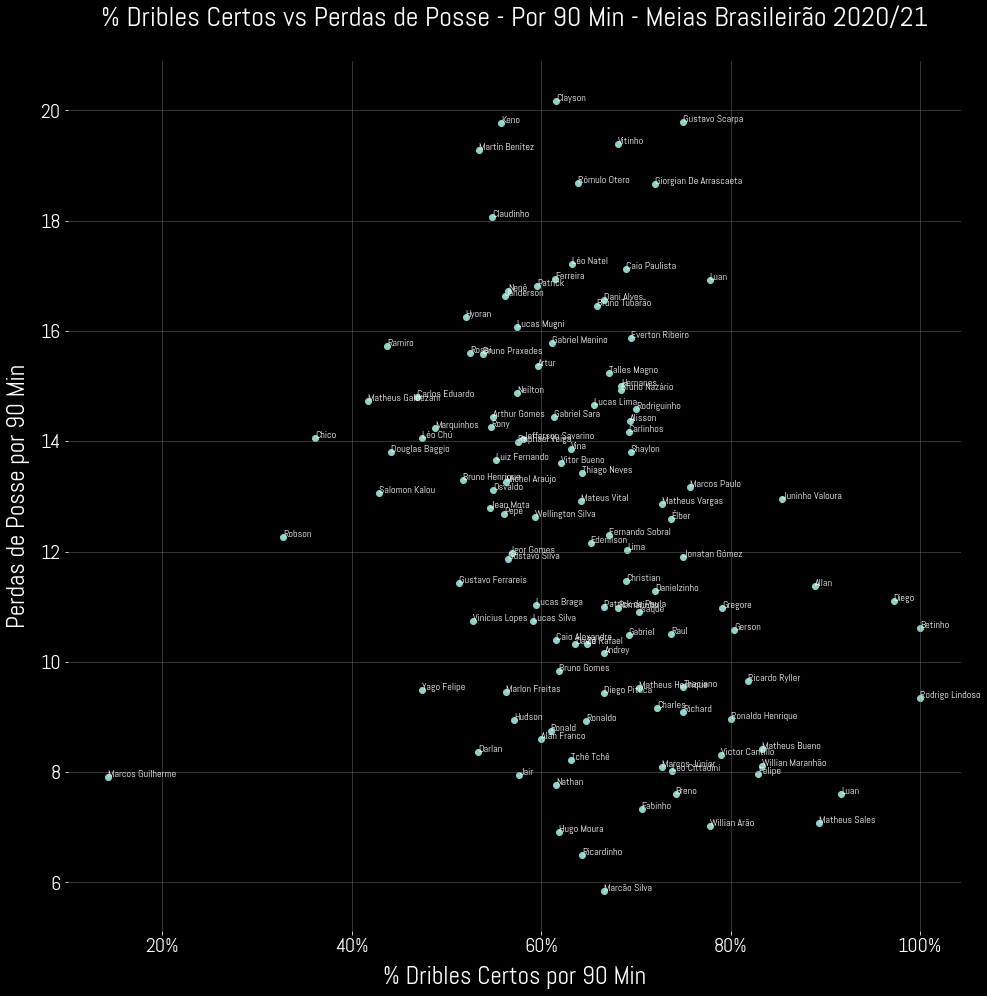

In [156]:
#Defining style and properties
plt.style.use('dark_background')
plt.rc('font', family='Abel')
fig,ax = plt.subplots(figsize=(16,16))
fpath = Path(mpl.get_data_path(), "fonts/ttf/Merriweather-Regular.ttf")

#Defining the scatter
plt.scatter(df_mf['successfulDribblesPercentage'],df_mf['possessionLost'])

#Annotation on the scatter points
for i in range (df_mf.shape[0]):
    plt.text(x=df_mf.successfulDribblesPercentage[i] + 0.002,
             y=df_mf.possessionLost[i] + 0.003,
             s = df_mf.player[i])
    
#Grid and axis properties
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))

#Texts
plt.title(f'% Dribles Certos vs Perdas de Posse - Por 90 Min - Meias Brasileirão 2020/21',
          fontsize = 28, pad = 35)
plt.xlabel(xlabel='% Dribles Certos por 90 Min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='Perdas de Posse por 90 Min', fontsize = 25, labelpad = 10)

#Showing the plot
plt.show()

#Saving
fig.savefig('DriblesvsPerdadePosse.png')

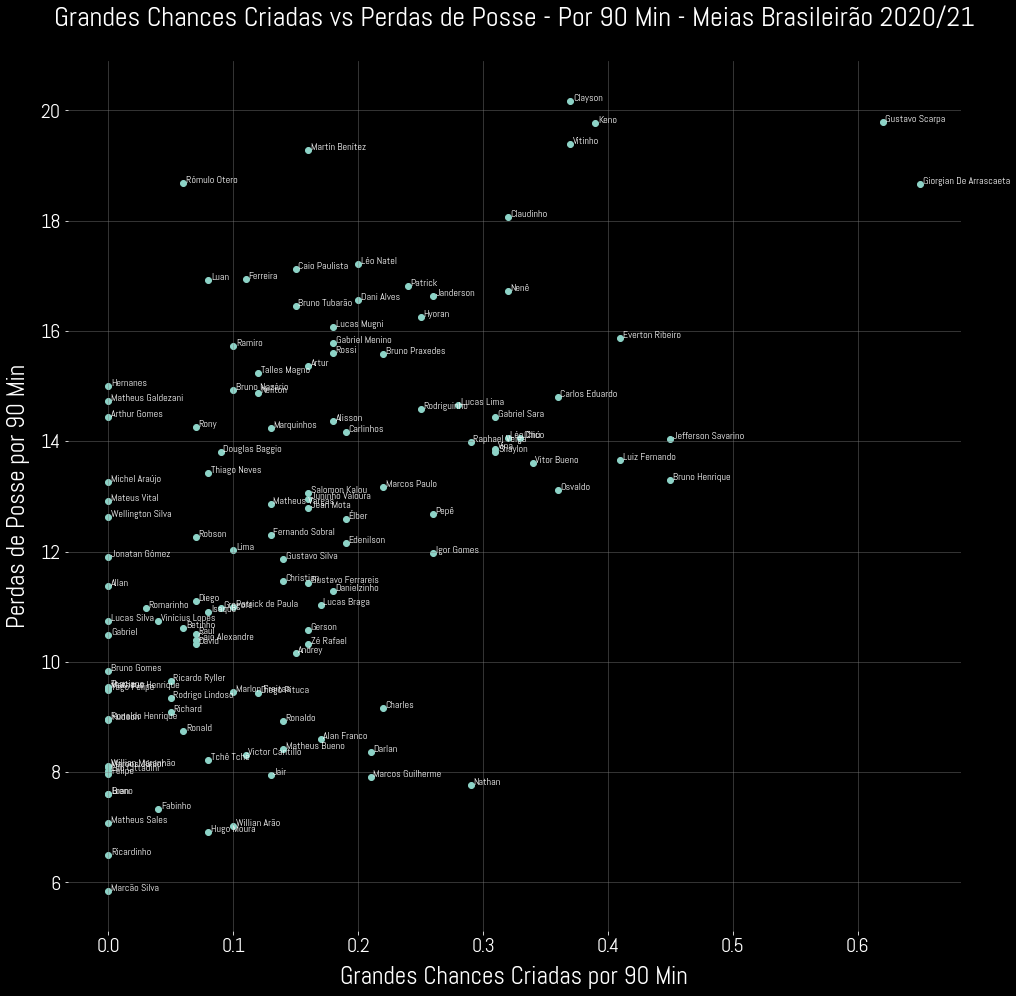

In [157]:
#Defining style and properties
plt.style.use('dark_background')
plt.rc('font', family='Abel')
fig,ax = plt.subplots(figsize=(16,16))
fpath = Path(mpl.get_data_path(), "fonts/ttf/Merriweather-Regular.ttf")

#Defining the scatter
plt.scatter(df_mf['bigChancesCreated'],df_mf['possessionLost'])

#Annotation on the scatter points
for i in range (df_mf.shape[0]):
    plt.text(x=df_mf.bigChancesCreated[i] + 0.002,
             y=df_mf.possessionLost[i] + 0.003,
             s = df_mf.player[i])
    
#Grid and axis properties
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))

#Texts
plt.title(f'Grandes Chances Criadas vs Perdas de Posse - Por 90 Min - Meias Brasileirão 2020/21',
          fontsize = 28, pad = 35)
plt.xlabel(xlabel='Grandes Chances Criadas por 90 Min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='Perdas de Posse por 90 Min', fontsize = 25, labelpad = 10)

#Showing the plot
plt.show()

#Saving
fig.savefig('PerdasdepossevsGrandesChancesCriadas.png')

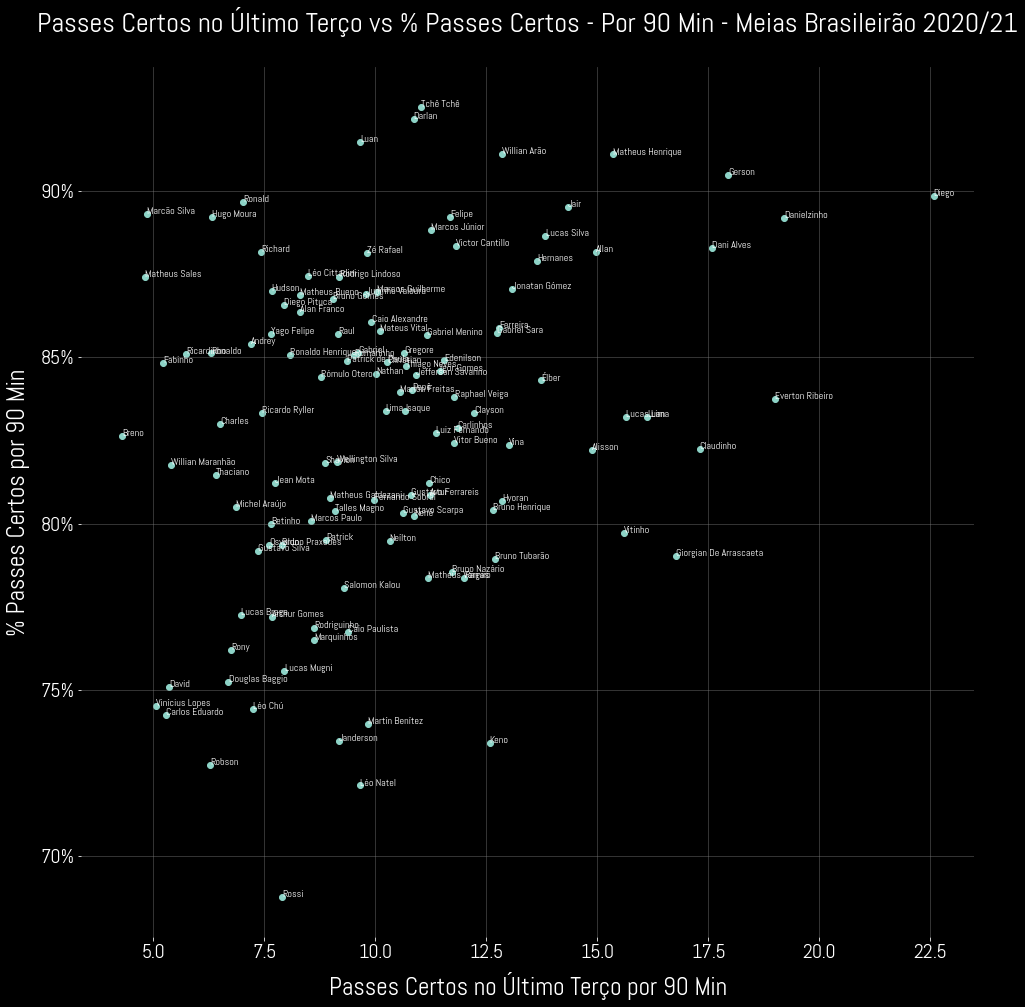

In [158]:
#Defining style and properties
plt.style.use('dark_background')
plt.rc('font', family='Abel')
fig,ax = plt.subplots(figsize=(16,16))
fpath = Path(mpl.get_data_path(), "fonts/ttf/Merriweather-Regular.ttf")

#Defining the scatter
plt.scatter(df_mf['accurateFinalThirdPasses'],df_mf['accuratePassesPercentage'])

#Annotation on the scatter points
for i in range (df_mf.shape[0]):
    plt.text(x=df_mf.accurateFinalThirdPasses[i] + 0.002,
             y=df_mf.accuratePassesPercentage[i] + 0.003,
             s = df_mf.player[i])
    
#Grid and axis properties
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))

#Texts
plt.title(f'Passes Certos no Último Terço vs % Passes Certos - Por 90 Min - Meias Brasileirão 2020/21',
          fontsize = 28, pad = 35)
plt.xlabel(xlabel='Passes Certos no Último Terço por 90 Min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='% Passes Certos por 90 Min', fontsize = 25, labelpad = 10)

#Showing the plot
plt.show()

#Saving
fig.savefig('UltimoTercovsPassesPctg.png')

In [159]:
labelsvol1=['player','groundDuelsWonPercentage','aerialDuelsWonPercentage','successfulDribblesPercentage','accuratePassesPercentage']
labelsvol2=['player','tackles','interceptions','goals','assists']
labelsmf1=['player','groundDuelsWonPercentage','aerialDuelsWonPercentage','successfulDribblesPercentage','accuratePassesPercentage']
labelsmf2= ['player','tackles','bigChancesCreated','goals','assists']

df_vol = df_mf[(df_mf['player'] == 'Willian Arão')
                                | (df_mf['player'] == 'Edenilson')
                                | (df_mf['player'] == 'Gerson')].reset_index(drop=True)
df_vol_vw1 = df_vol[labelsvol1]
df_vol_vw2 = df_vol[labelsvol2]

df_meias1 = df_mf[(df_mf['player'] == 'Claudinho')
                                | (df_mf['player'] == 'Vina')
                                | (df_mf['player'] == 'Giorgian De Arrascaeta')].reset_index(drop=True)
df_meias1_vw1 = df_meias1[labelsmf1]
df_meias1_vw2 = df_meias1[labelsmf2]               

df_meias2 = df_mf[(df_mf['player'] == 'Dani Alves')
                                | (df_mf['player'] == 'Keno')
                                | (df_mf['player'] == 'Everton Ribeiro')].reset_index(drop=True)
df_meias2_vw1 = df_meias2[labelsmf1]
df_meias2_vw2 = df_meias2[labelsmf2]   

In [160]:
categories = labelsvol1[1:]
categories = [*categories, categories[0]]

players = df_vol_vw1.values.tolist()

player_1 = players[0][1:]
player_1 = [*player_1, player_1[0]]
player_2 = players[1][1:]
player_2 = [*player_2, player_2[0]]
player_3 = players[2][1:]
player_3 = [*player_3, player_3[0]]

fig = go.Figure(
    data = [ go.Scatterpolar(r=player_1, theta = categories, name = players[0][0]),
             go.Scatterpolar(r=player_2, theta = categories, name = players[1][0]),
             go.Scatterpolar(r=player_3, theta = categories, name = players[2][0])],
    layout = go.Layout(
    autosize = False,
    width = 700,
    height = 500,
    title=go.layout.Title(text = 'Comparação Volantes - Visão 1'),
    polar = {'radialaxis':{'visible':True}},
    showlegend = True)
)

pyo.iplot(fig)

In [161]:
categories = labelsvol2[1:]
categories = [*categories, categories[0]]

players = df_vol_vw2.values.tolist()

player_1 = players[0][1:]
player_1 = [*player_1, player_1[0]]
player_2 = players[1][1:]
player_2 = [*player_2, player_2[0]]
player_3 = players[2][1:]
player_3 = [*player_3, player_3[0]]

fig = go.Figure(
    data = [ go.Scatterpolar(r=player_1, theta = categories, name = players[0][0]),
             go.Scatterpolar(r=player_2, theta = categories, name = players[1][0]),
             go.Scatterpolar(r=player_3, theta = categories, name = players[2][0])],
    layout = go.Layout(
    autosize = False,
    width = 700,
    height = 500,
    title=go.layout.Title(text = 'Comparação Volantes - Visão 2 (valores por 90 minutos jogados)'),
    polar = {'radialaxis':{'visible':True}},
    showlegend = True)
)

pyo.iplot(fig)

In [162]:
categories = labelsmf1[1:]
categories = [*categories, categories[0]]

players = df_meias1_vw1.values.tolist()

player_1 = players[0][1:]
player_1 = [*player_1, player_1[0]]
player_2 = players[1][1:]
player_2 = [*player_2, player_2[0]]
player_3 = players[2][1:]
player_3 = [*player_3, player_3[0]]

fig = go.Figure(
    data = [ go.Scatterpolar(r=player_1, theta = categories, name = players[0][0]),
             go.Scatterpolar(r=player_2, theta = categories, name = players[1][0]),
             go.Scatterpolar(r=player_3, theta = categories, name = players[2][0])],
    layout = go.Layout(
    autosize = False,
    width = 900,
    height = 500,
    title=go.layout.Title(text = 'Comparação Meias - Visão 1'),
    polar = {'radialaxis':{'visible':True}},
    showlegend = True)
)

pyo.iplot(fig)

In [163]:
categories = labelsmf2[1:]
categories = [*categories, categories[0]]

players = df_meias1_vw2.values.tolist()

player_1 = players[0][1:]
player_1 = [*player_1, player_1[0]]
player_2 = players[1][1:]
player_2 = [*player_2, player_2[0]]
player_3 = players[2][1:]
player_3 = [*player_3, player_3[0]]

fig = go.Figure(
    data = [ go.Scatterpolar(r=player_1, theta = categories, name = players[0][0]),
             go.Scatterpolar(r=player_2, theta = categories, name = players[1][0]),
             go.Scatterpolar(r=player_3, theta = categories, name = players[2][0])],
    layout = go.Layout(
    autosize = False,
    width = 900,
    height = 500,
    title=go.layout.Title(text = 'Comparação Meias - Visão 2'),
    polar = {'radialaxis':{'visible':True}},
    showlegend = True)
)

pyo.iplot(fig)

In [165]:
categories = labelsmf1[1:]
categories = [*categories, categories[0]]

players = df_meias2_vw1.values.tolist()

player_1 = players[0][1:]
player_1 = [*player_1, player_1[0]]
player_2 = players[1][1:]
player_2 = [*player_2, player_2[0]]
player_3 = players[2][1:]
player_3 = [*player_3, player_3[0]]

fig = go.Figure(
    data = [ go.Scatterpolar(r=player_1, theta = categories, name = players[0][0]),
             go.Scatterpolar(r=player_2, theta = categories, name = players[1][0]),
             go.Scatterpolar(r=player_3, theta = categories, name = players[2][0])],
    layout = go.Layout(
    autosize = False,
    width = 900,
    height = 500,
    title=go.layout.Title(text = 'Comparação Meias - Visão 1'),
    polar = {'radialaxis':{'visible':True}},
    showlegend = True)
)

pyo.iplot(fig)

In [164]:
categories = labelsmf2[1:]
categories = [*categories, categories[0]]

players = df_meias2_vw2.values.tolist()

player_1 = players[0][1:]
player_1 = [*player_1, player_1[0]]
player_2 = players[1][1:]
player_2 = [*player_2, player_2[0]]
player_3 = players[2][1:]
player_3 = [*player_3, player_3[0]]

fig = go.Figure(
    data = [ go.Scatterpolar(r=player_1, theta = categories, name = players[0][0]),
             go.Scatterpolar(r=player_2, theta = categories, name = players[1][0]),
             go.Scatterpolar(r=player_3, theta = categories, name = players[2][0])],
    layout = go.Layout(
    autosize = False,
    width = 900,
    height = 500,
    title=go.layout.Title(text = 'Comparação Meias - Visão 2'),
    polar = {'radialaxis':{'visible':True}},
    showlegend = True)
)

pyo.iplot(fig)